# Data Challenge

## Case Study

### Purpose behind the Challenge is to look at the viability of utilizing LED lights in the passenger staterooms. In this study machine learning algorithms will be utilized to determine the features that affect and prediction of the energy consumption of the staterooms.  Random Forest Regessor was used to determine which feature most affected total consumption.  The random forest regessor algorithm has the ability to handle large amount of variable and typically does not over-fit the analysis

## Background Information



### According to Matt Nurmi thesis titled "Improving the Energy Efficiency of a Cruise Ship Stateroom Aalto University School of Engineering".  Electrcity consumption is between 2300 - 3100Wh in energy consumption. When switching "from fluorescent ligting to LED lighting will result in savings of 20W in the lighting load"
    
### Data provided for the project is a public dataset via a third person.

## Importing Libraries and Data

In [64]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

#Importing data with dates parsing
df = pd.read_csv('data.csv', parse_dates=['date'])



## Dataset Description


Data Set Description

date time year-month-day hour:minute:second 
TotalConsmp (AC+TV+LED+Peripherals), energy use in Wh (Target)
R1, Temperature in Room 1, in Celsius
H_1, Humidity Room 1, in %
R2, Temperature in Room 2, in Celsius
H_2, Humidity in Room 2, in %
R3, Temperature in Room 3, in Celsius
H_3, Humidity in Room 3, in %
R4, Temperature Room 4, in Celsius
H_4, Humidity in Room 4, in %
R5, Temperature in Room 5, in Celsius
H_5, Humidity in Room 5, in %
R6, Temperature Room 6, in Celsius
H_6, Humidity in Room 6, in %
R7, Temperature in Room 7, in Celsius
H_7, Humidity in Room 7, in %
R8, Temperature in Room 8, in Celsius
H_8, Humidity in Room 8, in %
R9, Temperature in Room 9, in Celsius
H_9, Humidity in Room 9, in %
To, Temperature outside, in Celsius
Pressure outside, in mm Hg
RH_out, Humidity outside, in %
Windspeed, in m/s
Visibility, in km


# Exploratory Data Analysis

#### EDA allows the data scientist to detemine the structure and viability of the dataset.  At this point feature engineering can be applied to dataset to create additional features so that a better predictive power of the learning algorith can be applied.

In [65]:
df.head()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
0,2016-01-11 17:00:00,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000
1,2016-01-11 17:10:00,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667
2,2016-01-11 17:20:00,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333
3,2016-01-11 17:30:00,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000
4,2016-01-11 17:40:00,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667


In [66]:
df.tail()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
19730,2016-05-27 17:20:00,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,44.500000,24.7000,50.07400,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667
19731,2016-05-27 17:30:00,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,44.414286,24.7000,49.79000,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000
19732,2016-05-27 17:40:00,280,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,44.400000,24.7000,49.66000,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333
19733,2016-05-27 17:50:00,430,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,44.295714,24.6625,49.51875,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667
19734,2016-05-27 18:00:00,440,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,44.054000,24.7360,49.73600,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000


In [67]:
# Rounding one decimal place
df = np.around(df,decimals=0)

In [68]:
#obtain shape of dataframe
df.shape

(19735, 25)

In [69]:
# Determine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
date           19735 non-null datetime64[ns]
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R6             19735 non-null float64
H_6            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed   

In [70]:
# Statistic summary of data
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
TotalConsmp,19735.0,101.496833,104.380829,10.0,50.0,60.0,100.0,1110.0
R1,19735.0,21.698404,1.634558,17.0,21.0,22.0,23.0,26.0
H_1,19735.0,40.262782,3.989504,27.0,37.0,40.0,43.0,63.0
R2,19735.0,20.343096,2.214754,16.0,19.0,20.0,22.0,30.0
H_2,19735.0,40.423664,4.085590,20.0,38.0,40.0,43.0,56.0
R3,19735.0,22.255435,2.018780,17.0,21.0,22.0,23.0,29.0
H_3,19735.0,39.249759,3.267816,29.0,37.0,39.0,42.0,50.0
R4,19735.0,20.861312,2.065800,15.0,20.0,21.0,22.0,26.0
H_4,19735.0,39.022397,4.356271,28.0,36.0,38.0,42.0,51.0
R5,19735.0,19.595085,1.866141,15.0,18.0,19.0,21.0,26.0


#### Accorinding to the summary statistics average Total Energy Consumption(TotalCnsmp) is 10 Wh and a max of 1110 Wh. Outside Temp for this period has an average of -5.0 and a max of 26. Please note temperature is in celsius 

In [71]:
# To determine if there is any null values
pd.isnull(df).sum()

date           0
TotalConsmp    0
R1             0
H_1            0
R2             0
H_2            0
R3             0
H_3            0
R4             0
H_4            0
R5             0
H_5            0
R6             0
H_6            0
R7             0
H_7            0
R8             0
H_8            0
R9             0
H_9            0
TempOutSide    0
Press_mm_hg    0
H_OutSide      0
Windspeed      0
Visibility     0
dtype: int64

In [72]:
# to extract dates, time, month, day, weekday for feature extraction
df['dates'] = pd.to_datetime(df['date']).dt.strftime('%m/%d')
df['time'] = pd.to_datetime(df['date']).dt.strftime('%H')
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df['weekday'] = df['date'].dt.dayofweek


In [73]:
# To determine if the feature extraction of dates, time, month, day, weekday is in the working file.
df.head()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,dates,time,month,day,weekday
0,2016-01-11 17:00:00,90,20.0,48.0,19.0,45.0,20.0,45.0,19.0,46.0,...,7.0,734.0,92.0,7.0,63.0,01/11,17,01,11,0
1,2016-01-11 17:10:00,90,20.0,47.0,19.0,45.0,20.0,45.0,19.0,46.0,...,6.0,734.0,92.0,7.0,59.0,01/11,17,01,11,0
2,2016-01-11 17:20:00,80,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,...,6.0,734.0,92.0,6.0,55.0,01/11,17,01,11,0
3,2016-01-11 17:30:00,90,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,...,6.0,734.0,92.0,6.0,52.0,01/11,17,01,11,0
4,2016-01-11 17:40:00,100,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,...,6.0,734.0,92.0,6.0,48.0,01/11,17,01,11,0


In [74]:
df.tail()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,dates,time,month,day,weekday
19730,2016-05-27 17:20:00,100,26.0,47.0,26.0,42.0,27.0,41.0,25.0,46.0,...,23.0,755.0,56.0,3.0,24.0,05/27,17,05,27,4
19731,2016-05-27 17:30:00,90,26.0,46.0,26.0,42.0,27.0,41.0,25.0,46.0,...,23.0,755.0,56.0,4.0,24.0,05/27,17,05,27,4
19732,2016-05-27 17:40:00,280,26.0,47.0,26.0,43.0,27.0,42.0,25.0,46.0,...,22.0,755.0,56.0,4.0,25.0,05/27,17,05,27,4
19733,2016-05-27 17:50:00,430,26.0,47.0,25.0,43.0,27.0,41.0,25.0,46.0,...,22.0,755.0,57.0,4.0,26.0,05/27,17,05,27,4
19734,2016-05-27 18:00:00,440,26.0,47.0,25.0,43.0,27.0,41.0,25.0,46.0,...,22.0,755.0,57.0,4.0,27.0,05/27,18,05,27,4


In [75]:
# Change month, day,time, weekday date converted to numeric
df['month'] = pd.to_numeric(df.month, errors='coerce')
df['day'] = pd.to_numeric(df.day, errors='coerce')
df['time'] = pd.to_numeric(df.time, errors='coerce')
df['weekday'] = pd.to_numeric(df.weekday, errors='coerce')

## Histogram of Total Energy Consumption

Text(0.5,1,'Fig 1. Histogram of Total Energy Consumption')

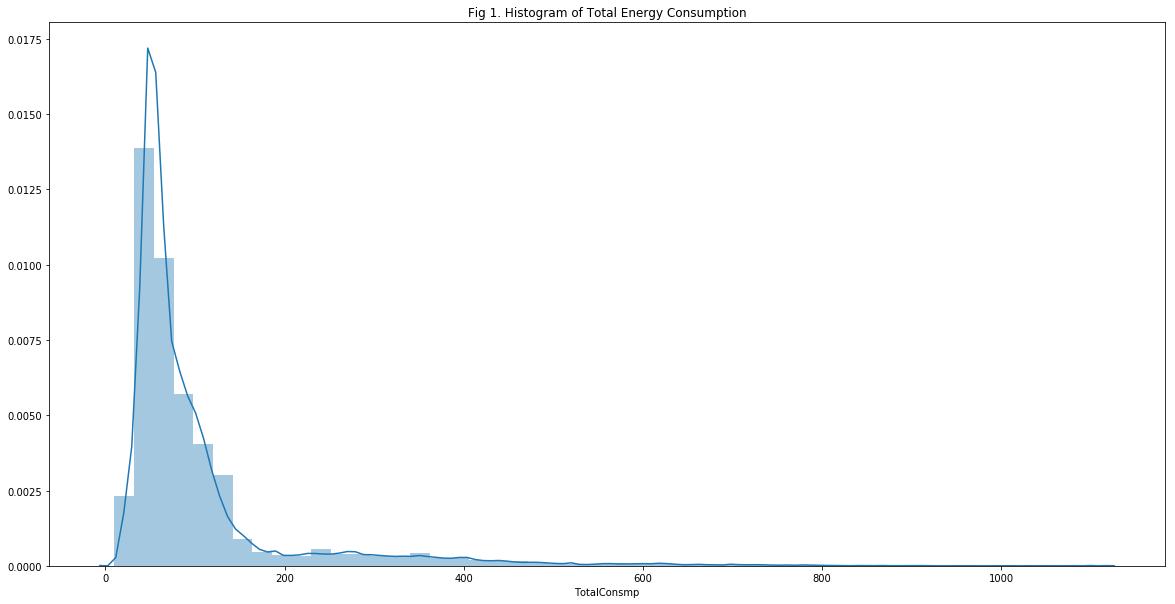

In [76]:
sns.distplot(df.TotalConsmp)
fig = plt.gcf()
fig.set_size_inches( 20, 10)
plt.title('Fig 1. Histogram of Total Energy Consumption')

#### As one can see the TotalConsmp feature appears to be right skewed 101 Wh (Target Variable)

## Line Plots

#### Line plots below is comparing Total energy consumption versus variation of the datetime variable.  Interesting note on the month chart how the energy consumption decreased as the data set elaplsed into the summer months which could be possibility of retrofitting older vessel with up grades in energy efficient sytems.  In the weekday plot the total decreases after Sunday which depending on the vessel could be the turn-around day for the crew.  For the time chart one will note the low consumptions between midnight and 6 am. After 6 am the power is 140 Wh until the peak at 6pm when consumption increases to 200 Wh which could be explained be passengers entering their stateroom for preparation for evening actvities.

Text(0.5,1,'Fig 2. Total Energy Consumption versus Month')

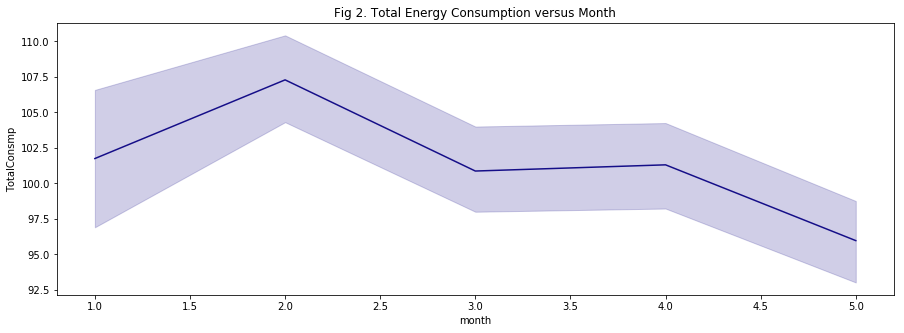

In [77]:
ax = sns.lineplot(x="month", y="TotalConsmp", data=df,color= '#150e88')
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 2. Total Energy Consumption versus Month')

Text(0.5,1,'Fig 3. Total Energy Consumption versus Weekday')

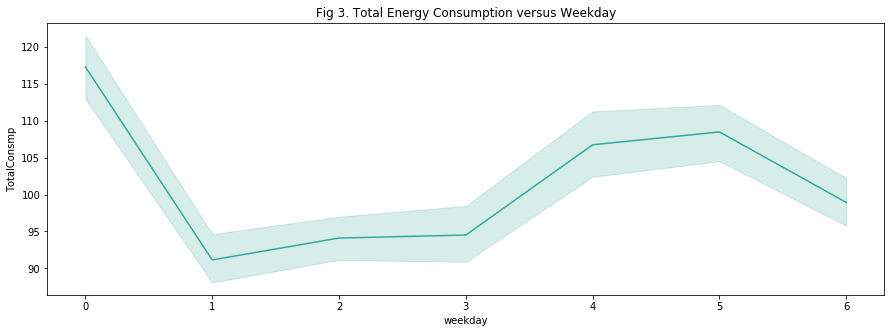

In [78]:
ax = sns.lineplot(x="weekday", y="TotalConsmp", data=df, color ='#34a99a')
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 3. Total Energy Consumption versus Weekday')

Text(0.5,1,'Fig 4. Total Energy Consumption versus Time')

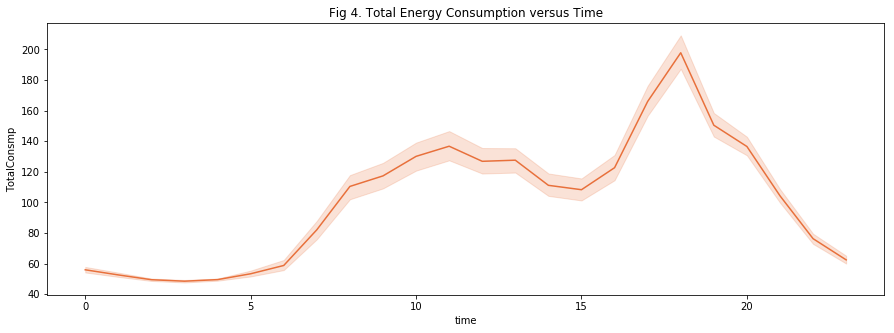

In [79]:
ax = sns.lineplot(x="time", y="TotalConsmp", data=df,color='#e8703b')
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 4. Total Energy Consumption versus Time')

#### Depending on the geographic location one can see as in the month versus Temp chart an increase in the temp and possibility of decrease in humidity

Text(0.5,1,'Fig 5.Month versus Outside Temperature')

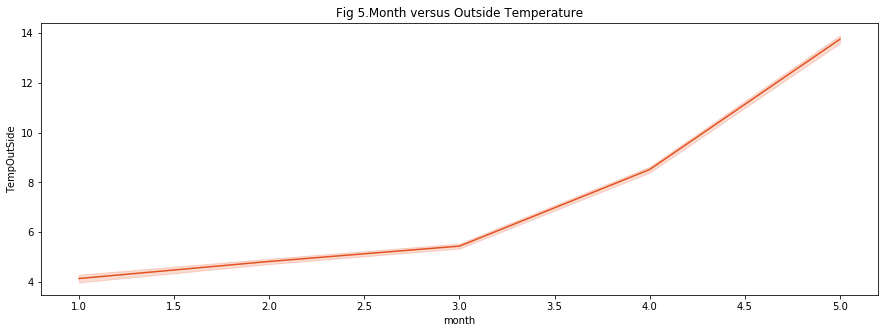

In [80]:
ax = sns.lineplot(x="month", y="TempOutSide", data=df,color= '#e55120')
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 5.Month versus Outside Temperature')

Text(0.5,1,'Fig 6. Month versus Outside Humidity')

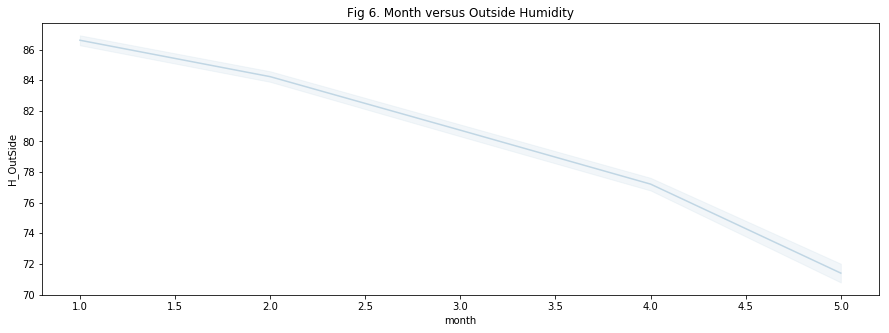

In [81]:
ax = sns.lineplot(x="month", y="H_OutSide", data=df,color='#c0d6e4')
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 6. Month versus Outside Humidity')

## Box plot of Room Temps

#### Plot of the rooms temp and humidy please note possible issue with Room 6 temperature and humidity outputs which will be further explored next

Text(0.5,1,'Fig 7. Box plot of Room Temps')

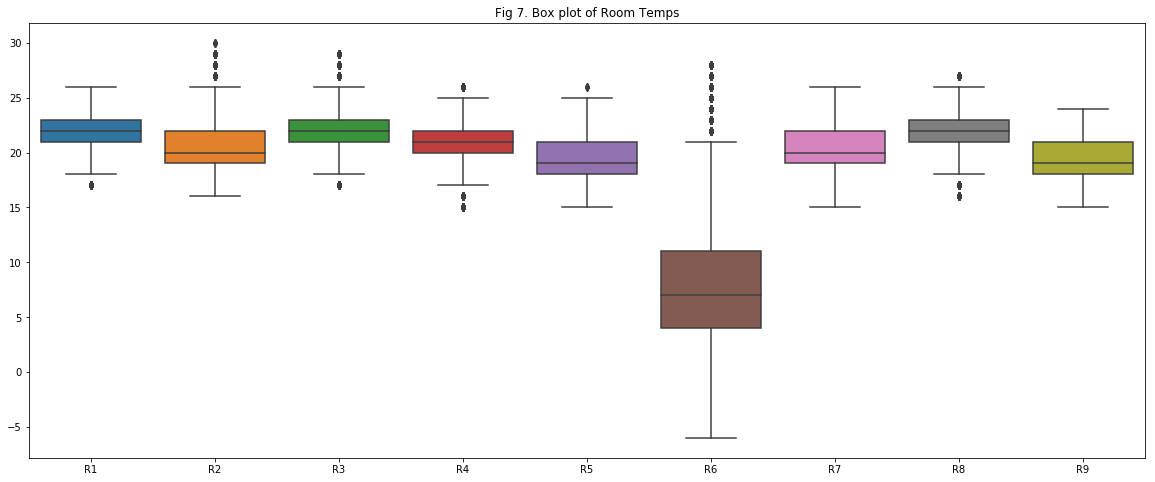

In [82]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
ax = sns.boxplot(data=df,order=["R1", "R2","R3","R4","R5","R6","R7","R8","R9"])
plt.title('Fig 7. Box plot of Room Temps')

## Box plot of Humidity Recordings

Text(0.5,1,'Fig 8. Box plot of Humidity Records')

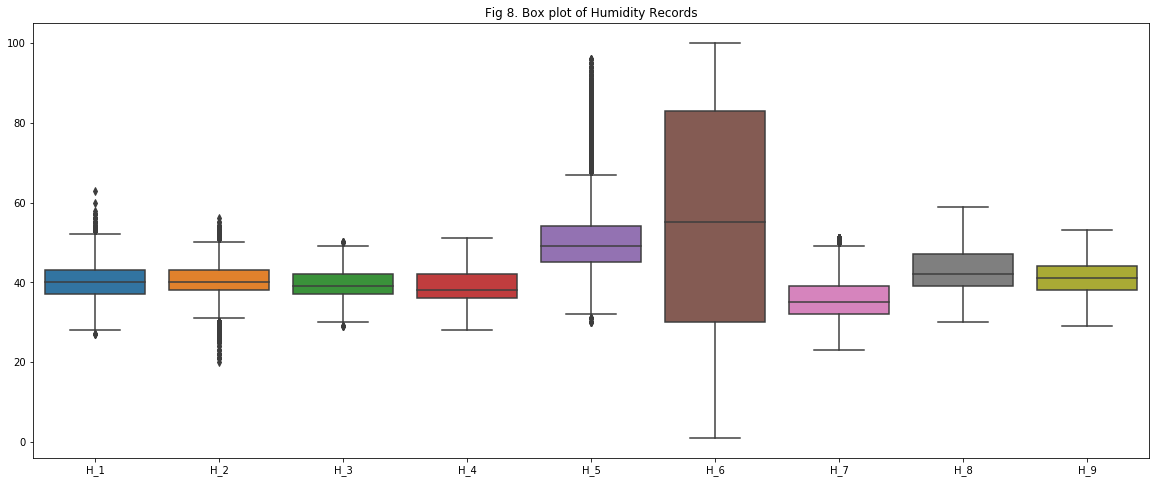

In [83]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
ax = sns.boxplot(data=df,order=["H_1","H_2", "H_3","H_4","H_5","H_6","H_7","H_8","H_9"])
plt.title('Fig 8. Box plot of Humidity Records')

## Temperature Scatter plots

#### Comparison of the Room temperatures to see if there is an pattern.  One should note that only room 6 has a possible negative trend.  

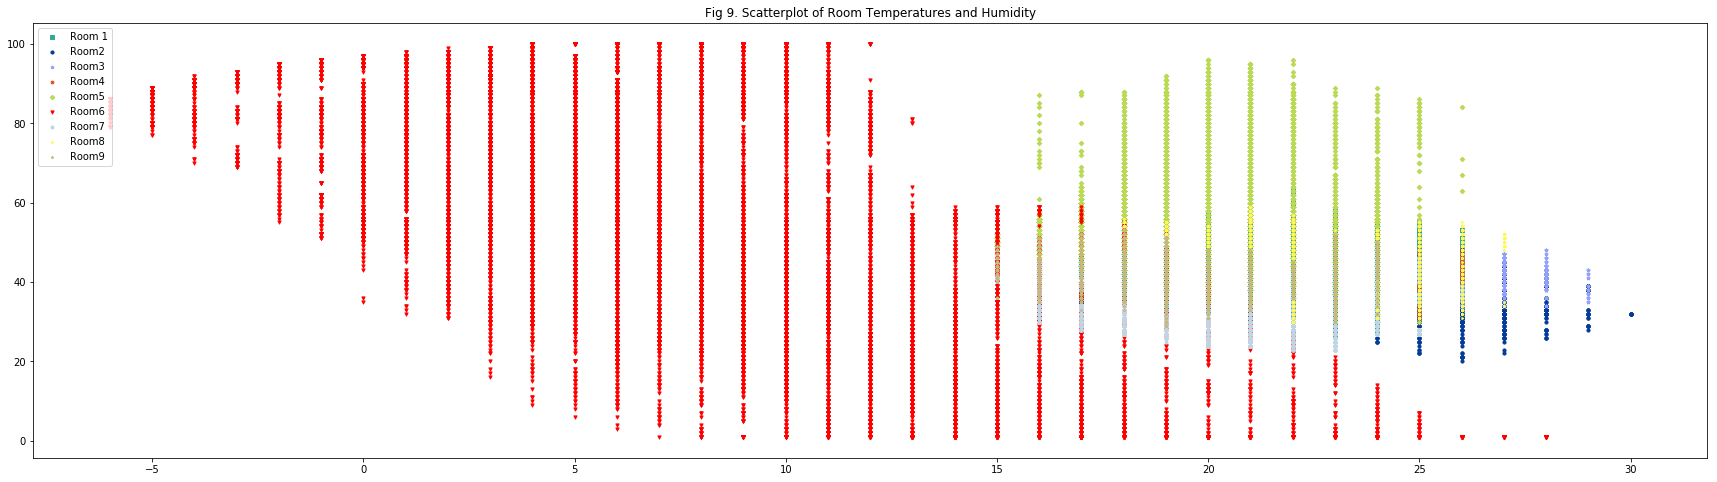

In [84]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

fig = plt.gcf()
fig.set_size_inches(30, 8)

ax1.scatter(x=[df.R1], y=[df.H_1], s=20, c='#34a99a', marker="s", label='Room 1')
ax1.scatter(x=[df.R2],y=[df.H_2], s=10, c='#033c99', marker="o", label='Room2')
ax1.scatter(x=[df.R3], y=[df.H_3], s=10, c='#94a1fa', marker="*", label='Room3')
ax1.scatter(x=[df.R4],y=[df.H_4], s=10, c='#e55120', marker="p", label='Room4')
ax1.scatter(x=[df.R5], y=[df.H_5], s=10, c='#bada55', marker="D", label='Room5')
ax1.scatter(x=[df.R6],y=[df.H_6], s=10, c='red', marker="v", label='Room6')
ax1.scatter(x=[df.R7], y=[df.H_7], s=10, c='#c0d6e4', marker="8", label='Room7')
ax1.scatter(x=[df.R8],y=[df.H_8], s=10, c='#fff85b', marker="4", label='Room8')
ax1.scatter(x=[df.R9], y=[df.H_9], s=10, c='#c7b87c', marker="2", label='Room9')

plt.legend(loc='upper left');
plt.title('Fig 9. Scatterplot of Room Temperatures and Humidity')
plt.show()

### Scatterplots of room 1 and 6 where used to compare trends.

Text(0.5,1,'Fig 10. Scattplot of Room 1 Temperature and Humidity')

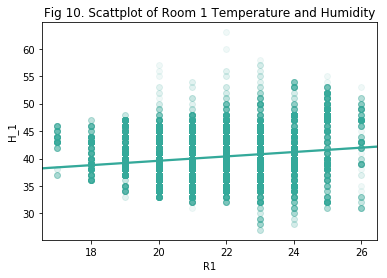

In [85]:
sns.regplot(x="R1",y="H_1",data=df,color='#34a99a',
           scatter_kws={'alpha':0.07})
plt.title('Fig 10. Scattplot of Room 1 Temperature and Humidity')

Text(0.5,1,'Fig 11. Scattplot of Room 6 Temperature and Humidity')

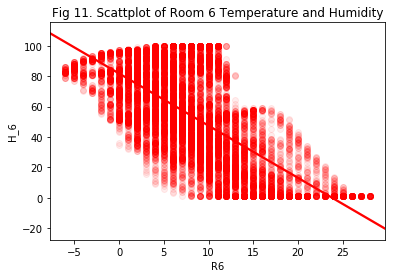

In [86]:
sns.regplot(x="R6",y="H_6",data=df,color='red',
           scatter_kws={'alpha':0.07})
plt.title('Fig 11. Scattplot of Room 6 Temperature and Humidity')

## Data anamoly noted with Room 6

Text(0.5,1,'Fig 12. Line plot of Room 6 Temperature versus Time')

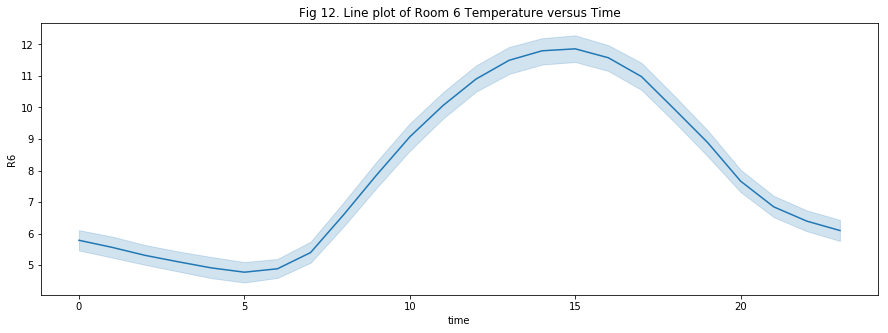

In [87]:
ax = sns.lineplot(x="time", y="R6", data=df)
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 12. Line plot of Room 6 Temperature versus Time')

Text(0.5,1,'Fig 13. Line plot of Room 6 Temperature versus day')

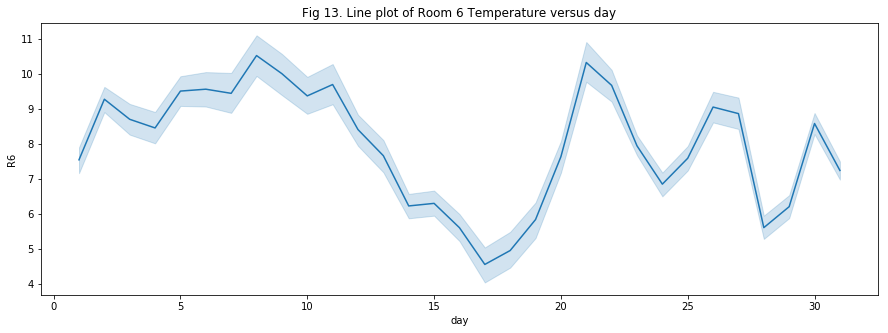

In [88]:
ax = sns.lineplot(x="day", y="R6", data=df)
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 13. Line plot of Room 6 Temperature versus day')

Text(0.5,1,'Fig 14. Line plot of Room 6 Temperature versus month')

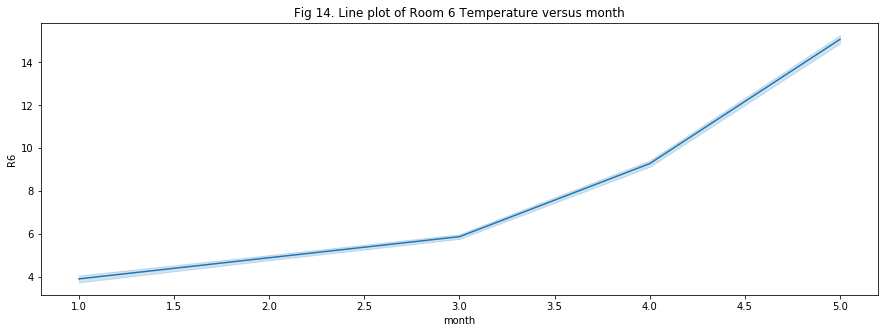

In [89]:
ax = sns.lineplot(x="month", y="R6", data=df)
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.title('Fig 14. Line plot of Room 6 Temperature versus month')

Text(0.5,1,'Fig 15. Scattplot of Room 6 Temperature and Humidity')

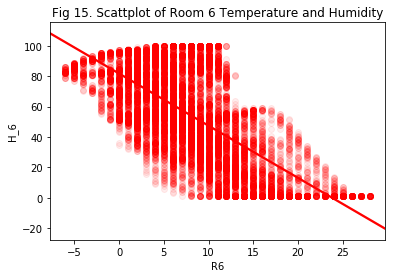

In [90]:
sns.regplot(x="R6",y="H_6",data=df,color='red',
           scatter_kws={'alpha':0.07})
plt.title('Fig 15. Scattplot of Room 6 Temperature and Humidity')

#### Upon further investigation the data anamoly noted in Room 6 was both the temperature and humidity sensors.  The two sensors experienced failures several times in the data set and occured seperately from each other. Which eliminates to possibility of electrical issues.  The anamoly is not seen in the line graphs but the trend could be seen scatterplot.  While the mean for both the temperature and humidity was close to the rest of the rooms the outliers greatly affected the readings.  Thus put the observatons for room 6 into question. Without knowledge behind the sensor mechanisms and any prior knowledge of the system the decision to remove data from Room 6 was made since there could be a potential issue with data imputation.

# Pre-Processing 

### Pre-Processing is the step that will be used to drop features not needed in the model.  Also at the time a working file (dfFinal) will be done so that the original dataframe file is not modified in anyway. At this the dataset will be split into a training and testing set by utilizing sklearn packages

In [36]:
# Drop the features not needed for the analysis
df = df.drop(columns=['R6', 'H_6','date','dates'])

In [37]:
dfFinal = df.copy(deep=True)
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 26 columns):
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed      19735 non-null float64
Visibility     19735 non-null float64
time           19735 non-null int64
month          19735 

In [38]:
# To determine if the final file is viable
dfFinal.head()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,time,month,day,weekday
0,90,20.0,48.0,19.0,45.0,20.0,45.0,19.0,46.0,17.0,...,46.0,7.0,734.0,92.0,7.0,63.0,17,1,11,0
1,90,20.0,47.0,19.0,45.0,20.0,45.0,19.0,46.0,17.0,...,46.0,6.0,734.0,92.0,7.0,59.0,17,1,11,0
2,80,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,17.0,...,46.0,6.0,734.0,92.0,6.0,55.0,17,1,11,0
3,90,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,17.0,...,45.0,6.0,734.0,92.0,6.0,52.0,17,1,11,0
4,100,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,17.0,...,45.0,6.0,734.0,92.0,6.0,48.0,17,1,11,0


In [39]:
# label the X and y for the modelling
X = dfFinal.iloc[:, 1:26].values
y = dfFinal.iloc[:, 0].values

In [40]:
# To confirm the shape of X 
X.shape

(19735, 25)

In [41]:
# To confirm the shape of y
y.shape

(19735,)

In [42]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=35)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
# Shape and Size of Training and Test Data
print('Training Features Shape:', X_train.shape)
print('Training Label Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Label Shape:', y_test.shape)

Training Features Shape: (15788, 25)
Training Label Shape: (3947, 25)
Testing Features Shape: (15788,)
Testing Label Shape: (3947,)


## Data Modeling

#### For this analysis a random forest regressor was utilized instead of multi-linear regression model do the number of features in the dataset. The algorithm can handle both regression and classification problems with high accuracy. Random Forest is also able to handle high dimensional data with large amounts of input features and variables.  Along with the accuracy the algorithm tends not to overfit data.


In [44]:
#Train Model
clf = RandomForestRegressor(n_jobs=2, n_estimators=1000)
model = clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Results

In [49]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = clf.predict(X_train)
predicted_test = clf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score: 0.613
Test data Pearson correlation: 0.783


In [50]:
features = dfFinal.columns[1:26]

In [51]:
importances = clf.feature_importances_
indices = np.argsort(importances)

Text(0.5,0,'Relative Importance')

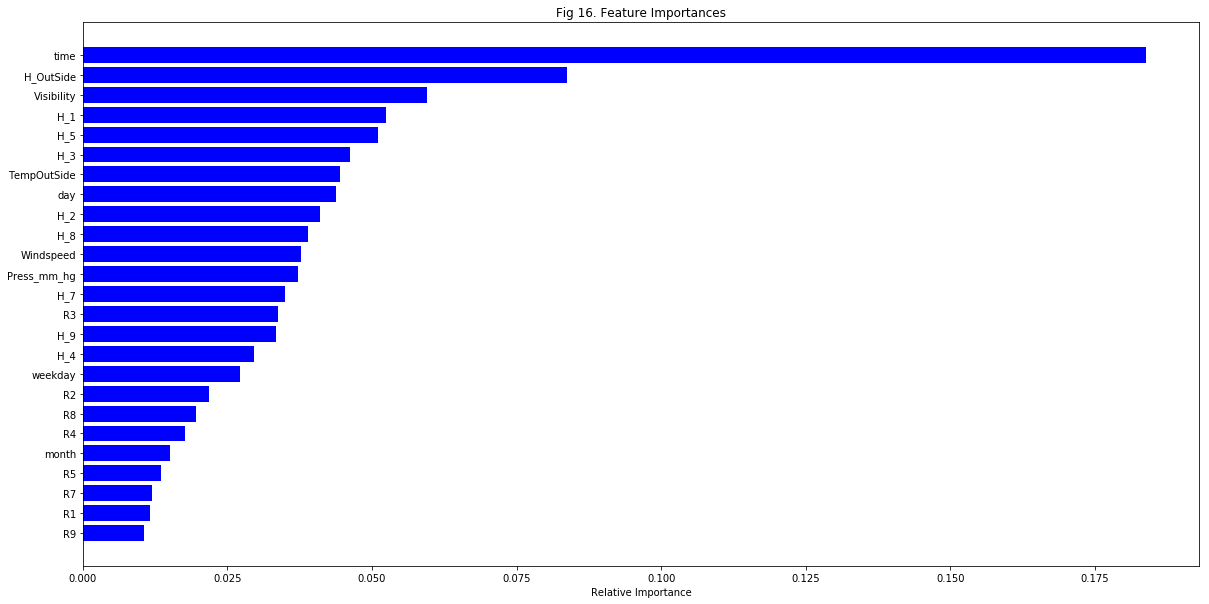

In [91]:
fig = plt.gcf()
fig.set_size_inches( 20, 10)
plt.figure(1)
plt.title('Fig 16. Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Analysis

#### For the output the R2 score of .61 and a Pearson correlation of .783 with signifies a strong positive correlation between time and energy consumption.   Feature importance has time of day and outside humidity above the 0.060 point with time having the greatest importance (see fig 6).  In the graph of total energy consumption versus time of day it appears as guest begin to commence into their daily activities energy consumption increases with a average around 120 Wh between the areas of 8am to 3pm.  With a peak around 130 Wh which could be from guest returning to their staterooms to prepare for the evening activities.  Assuming the room where a mixture of locations around the ship some of the guestrooms could be exterior rooms with door systems to allow for influence of the exterior conditions. This of course would increased the usage of the HVAC and assumption would need to be made in regards if the guest desired to open the exterior doors. 


## Conclusion

#### The post analysis shows two features above the 0.060 point. Time and Outside Humidity had the largest impact on the algorithm. By Understanding passenger activities the time variable makes sense knowing in the afternoon hours individuals will be preparing for the evening activities.  This dataset is limited in many ways and further data sampling will be needed. For example without knowledge of placement of stateroom in the system i.e. balcony versus interior statement.  Is the dataset from a newer build or older vessel in the fleet.  Another issues is with the Total Energy Consumption variable this is of course total energy consumption of the stateroom.  Future sampling projects would need to look at a break down if possible a break down of the energy consumption components of the system (staterooms). For a future project total energy have the individual staterooms be engineered to be able to monitor energy consumption (similar to a smart meter design). 
